### Created by: Anthony D. Cho
### Last update: 06.12.2021

**Subject**: Classification (Embedding MLP - keras, tensorflow) - Reviews of Amazon Baby Products

## Libraries dependencies

In [1]:
from time import time
import matplotlib.pyplot as plt
from numpy import round
from pandas import read_csv

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Text processing functions
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Model functions
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

## Customized functions

In [2]:
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    History performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

# Problem: Reviews of Amazon Baby Products

**Target**: Sentiment (0: Negative, 1: Positive)

## Data loading
Source: [Reviews of Amazon Baby Products](https://www.kaggle.com/sameersmahajan/reviews-of-amazon-baby-products) (Kaggle)

In [3]:
## Downloading data
!wget https://github.com/adoc-box/Datasets/blob/6d80f44a12aca282b7f2ff638866edef4806a282/amazon_baby.zip?raw=True

## Rename file
!mv "amazon_baby.zip?raw=True" "amazon_baby.zip"

## Un-compress downloaded zip file
!unzip amazon_baby.zip

--2021-12-06 22:21:00--  https://github.com/adoc-box/Datasets/blob/6d80f44a12aca282b7f2ff638866edef4806a282/amazon_baby.zip?raw=True
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/adoc-box/Datasets/raw/6d80f44a12aca282b7f2ff638866edef4806a282/amazon_baby.zip [following]
--2021-12-06 22:21:00--  https://github.com/adoc-box/Datasets/raw/6d80f44a12aca282b7f2ff638866edef4806a282/amazon_baby.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adoc-box/Datasets/6d80f44a12aca282b7f2ff638866edef4806a282/amazon_baby.zip [following]
--2021-12-06 22:21:00--  https://raw.githubusercontent.com/adoc-box/Datasets/6d80f44a12aca282b7f2ff638866edef4806a282/amazon_baby.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.

In [4]:
## Load data
data = read_csv('amazon_baby.csv')

## Lets assing sentiment as: Ratings {1,2} to 0, and the rest to 1
data['sentiment'] = data['rating'].apply(lambda x: 0 if x in [1, 2] else 1)

## Predictor and target
X, y = data['review'], data['sentiment']

## Display first 4 records
data.head(4)

,name,review,rating,sentiment
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1


## Pre-processing

In [5]:
## Data partition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20211206)

## Convert DataFrame to list
X_train = [str(p) for p in X_train]
X_test = [str(p) for p in X_test]

## Display shape
print('(train) X: {}, y: {}'.format(len(X_train), len(y_train)))
print('(test) X: {}, y: {}'.format(len(X_test), len(y_test)))

(train) X: 165177, y: 165177
(test) X: 18354, y: 18354


### Text transformation

In [6]:
## maximum number of words to keep
MAX_WORDS = 40000

## Embeeding dimension
EMBEDDING_DIM = 16

## Maximum length for each review
TEXT_MAX_LENG = 120

## Review truncating method (pre or post)
TRUNC_TYPE = 'post'

## out-of-vocabulary label
OOV_LABEL = '<OOV>'

## Padding method (pre or post text)
PAD_TYPE = 'post'

## Tokenizer instance
tokenizer = Tokenizer(num_words=MAX_WORDS, 
                      oov_token=OOV_LABEL)

## Update internal vocabulary based on a list of texts
tokenizer.fit_on_texts(X_train)

## Display word-index in tokenizer
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'i': 4,
 'it': 5,
 'to': 6,
 'a': 7,
 'is': 8,
 'this': 9,
 'for': 10,
 'my': 11,
 'of': 12,
 'in': 13,
 'that': 14,
 'with': 15,
 'on': 16,
 'was': 17,
 'but': 18,
 'have': 19,
 'we': 20,
 'so': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'as': 25,
 'one': 26,
 'baby': 27,
 'they': 28,
 'very': 29,
 'when': 30,
 'be': 31,
 'great': 32,
 'would': 33,
 'just': 34,
 'at': 35,
 'up': 36,
 'out': 37,
 'use': 38,
 'can': 39,
 'like': 40,
 "it's": 41,
 'all': 42,
 'these': 43,
 'our': 44,
 'if': 45,
 'had': 46,
 'he': 47,
 'them': 48,
 'she': 49,
 'or': 50,
 'her': 51,
 'has': 52,
 'love': 53,
 'seat': 54,
 'little': 55,
 'easy': 56,
 'get': 57,
 'old': 58,
 'from': 59,
 'well': 60,
 'only': 61,
 'will': 62,
 'because': 63,
 'more': 64,
 'really': 65,
 'also': 66,
 'product': 67,
 'time': 68,
 'about': 69,
 'other': 70,
 'too': 71,
 'bought': 72,
 'no': 73,
 'than': 74,
 'good': 75,
 'much': 76,
 'son': 77,
 'me': 78,
 'now': 79,
 "don't": 80,
 'there': 81,
 

In [7]:
## Transforms each text in train texts to a sequence of integers.
X_train_sequences = tokenizer.texts_to_sequences(X_train)

## Pads sequences to the same length.
X_train_sequences = pad_sequences(sequences=X_train_sequences, 
                                  maxlen=TEXT_MAX_LENG, 
                                  truncating=TRUNC_TYPE, 
                                  padding=PAD_TYPE)

## Transforms each text in test texts to a sequence of integers.
X_test_sequences = tokenizer.texts_to_sequences(X_test)

## Pads sequences to the same length.
X_test_sequences = pad_sequences(sequences=X_test_sequences, 
                                 maxlen=TEXT_MAX_LENG,
                                 truncating=TRUNC_TYPE,
                                 padding=PAD_TYPE)

## Display shape
print('(train) X: {}, y: {}'.format(X_train_sequences.shape, len(y_train)))
print('(test) X: {}, y: {}'.format(X_test_sequences.shape, len(y_test)))

(train) X: (165177, 120), y: 165177
(test) X: (18354, 120), y: 18354


## Model building

In [8]:
## Model instance
model = Sequential(name='Sentiment_Analysis')
model.add( layers.Embedding(input_dim=MAX_WORDS, 
                            output_dim=EMBEDDING_DIM,
                            input_length=TEXT_MAX_LENG, 
                            name='Embedding') )
model.add( layers.GlobalAveragePooling1D(name='GlobAvgPool1D') )
model.add( layers.Dense(units=6, 
                        activation='relu', 
                        name='Dense') )
model.add( layers.Dense(units=1, 
                        activation='sigmoid', 
                        name='output') )

## Model display
model.summary()

Model: "Sentimental_Analysis"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 120, 16)           640000    
                                                                 
 GlobAvgPool1D (GlobalAverag  (None, 16)               0         
 ePooling1D)                                                     
                                                                 
 Dense (Dense)               (None, 6)                 102       
                                                                 
 output (Dense)              (None, 1)                 7         
                                                                 
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
_________________________________________________________________


In [9]:
start = time()

## Compiler settings
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.0005), 
              metrics=['accuracy'])

## model fitting
history = model.fit(X_train_sequences, y_train,
                    epochs=20, batch_size=32,
                    validation_split=0.1)

print('Time spent: {:.2f}'.format(time() -start))

Epoch 1/20
4646/4646 [==============================] - 33s 7ms/step - loss: 0.3938 - accuracy: 0.8556 - val_loss: 0.3073 - val_accuracy: 0.8650
Epoch 2/20
4646/4646 [==============================] - 30s 6ms/step - loss: 0.2496 - accuracy: 0.8930 - val_loss: 0.2375 - val_accuracy: 0.8999
Epoch 3/20
4646/4646 [==============================] - 30s 6ms/step - loss: 0.2146 - accuracy: 0.9110 - val_loss: 0.2216 - val_accuracy: 0.9091
Epoch 4/20
4646/4646 [==============================] - 30s 6ms/step - loss: 0.2000 - accuracy: 0.9171 - val_loss: 0.2151 - val_accuracy: 0.9103
Epoch 5/20
4646/4646 [==============================] - 30s 6ms/step - loss: 0.1915 - accuracy: 0.9209 - val_loss: 0.2126 - val_accuracy: 0.9117
Epoch 6/20
4646/4646 [==============================] - 30s 6ms/step - loss: 0.1854 - accuracy: 0.9237 - val_loss: 0.2115 - val_accuracy: 0.9137
Epoch 7/20
4646/4646 [==============================] - 29s 6ms/step - loss: 0.1803 - accuracy: 0.9262 - val_loss: 0.2114 - val_ac

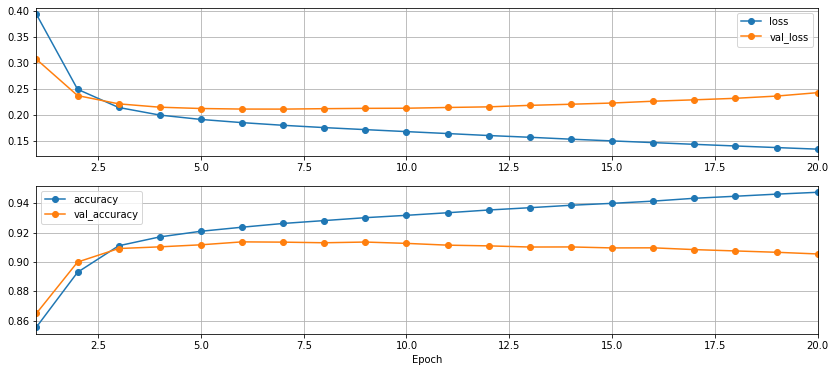

574/574 [==============================] - 2s 3ms/step - loss: 0.2357 - accuracy: 0.9048
[0.23566944897174835, 0.9047619104385376]


In [10]:
## display performances
plot_history(history, width=14)

## evaluate test set in the model
print(model.evaluate(X_test_sequences, y_test))

## Compute prediction using test generator
prediction = model.predict(X_test_sequences)

In [11]:
## Decoding labels
y_true = y_test.values
prediction_decoded = round(prediction.flatten())

In [12]:
## display confusion matrix
print(confusion_matrix(y_true=y_true, y_pred=prediction_decoded))

## display classification report
print(classification_report(y_true=y_true, y_pred=prediction_decoded))

[[ 1724   907]
 [  841 14882]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      2631
           1       0.94      0.95      0.94     15723

    accuracy                           0.90     18354
   macro avg       0.81      0.80      0.80     18354
weighted avg       0.90      0.90      0.90     18354



## Best model

Looking into the performance charts, it seems to stabilize (kind of overfit) starting at epoch 7 (Accuracy metric).

In [14]:
## Model instance
model = Sequential(name='Sentiment_Analysis')
model.add( layers.Embedding(input_dim=MAX_WORDS, 
                            output_dim=EMBEDDING_DIM,
                            input_length=TEXT_MAX_LENG, name='Embedding') )
model.add( layers.GlobalAveragePooling1D(name='GlobAvgPool1D') )
model.add( layers.Dense(units=6, activation='relu', name='Dense') )
model.add( layers.Dense(units=1, activation='sigmoid', name='output') )

start = time()

## Compiler settings
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.0005), 
              metrics=['accuracy'])

## model fitting
history = model.fit(X_train_sequences, y_train,
                    epochs=7, batch_size=32)

print('Time spent: {:.2f}'.format(time() -start))

Epoch 1/7
5162/5162 [==============================] - 32s 6ms/step - loss: 0.3398 - accuracy: 0.8667
Epoch 2/7
5162/5162 [==============================] - 32s 6ms/step - loss: 0.2207 - accuracy: 0.9076
Epoch 3/7
5162/5162 [==============================] - 32s 6ms/step - loss: 0.1999 - accuracy: 0.9169
Epoch 4/7
5162/5162 [==============================] - 32s 6ms/step - loss: 0.1898 - accuracy: 0.9218
Epoch 5/7
5162/5162 [==============================] - 32s 6ms/step - loss: 0.1831 - accuracy: 0.9245
Epoch 6/7
5162/5162 [==============================] - 32s 6ms/step - loss: 0.1778 - accuracy: 0.9266
Epoch 7/7
5162/5162 [==============================] - 32s 6ms/step - loss: 0.1734 - accuracy: 0.9288
Time spent: 222.43


In [15]:
## evaluate test set in the model
print(model.evaluate(X_test_sequences, y_test))

## Compute prediction using test generator
prediction = model.predict(X_test_sequences)

574/574 [==============================] - 2s 3ms/step - loss: 0.2080 - accuracy: 0.9129
[0.20795197784900665, 0.9129344820976257]


In [16]:
## Decoding labels
y_true = y_test.values
prediction_decoded = round(prediction.flatten())

## display confusion matrix
print(confusion_matrix(y_true=y_true, y_pred=prediction_decoded))

## display classification report
print(classification_report(y_true=y_true, y_pred=prediction_decoded))

[[ 1604  1027]
 [  571 15152]]
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      2631
           1       0.94      0.96      0.95     15723

    accuracy                           0.91     18354
   macro avg       0.84      0.79      0.81     18354
weighted avg       0.91      0.91      0.91     18354

